# <center>Dispersion</center>

## <center>Subsurface Processes for Alpha Release</center>

### General Theory

Dispersion will be done temporarily using the Delvigne algorithms until Debra finishes her work with VDROP.  According to Delvigne, $ Q_{disp} (kg/sec) $, the mass rate of oil driven into the first 1.5 wave height $ (1.5 H_w) $ depths with uniform spatial concentration is given per LE by:

$$
\begin{align}
c_{disp} &= \text{Roy's constant (see below)} \cr
\mathscr{D}_e &= \text{wave energy dissipation rate per unit area} \space (Joule/m^2) \cr
f_{bw} &= \text{fraction of breaking waves (see below)} \cr
f_{disp} &= \text{volume of oil entrained per unit volume of water (see below)} \cr
Vol_{LE} &= \text{volume of oil(emulsion) in the LE} \space (m^3) \cr
&\quad (\text{can be calculated as} Vol_{LE} = \mu_{LE} / \rho_{LE}) \cr
\delta_{th} &= \text{surface oil thickness (m)} \cr
f_{cov} &= \text{surface fraction coverage} \cr
Y &= \text{water fraction of emulsion} \cr
\cr
Q_{disp} &= c_{disp} \mathscr{D}_e^{0.57} f_{bw} f_{disp} {Vol_{LE} \over \delta_{th} \cdot f_{cov}} \cdot (1 - Y) \quad \quad (\text{in kg/sec}) \cr
\end{align}
$$

In [5]:
import numpy as np
from gnome import constants

def oil_mass_rate_into_wave(roys_constant,
                            wave_energy_dissipation_rate,
                            breaking_wave_fraction,
                            entrained_oil_volume,
                            oil_volume,
                            surface_oil_thickness,
                            surface_coverage,
                            water_emulsion_fraction):
    '''
        return the mass rate of oil driven into the first 1.5 wave height
    '''
    return (roys_constant *
            wave_energy_dissipation_rate ** (0.57) *
            breaking_wave_fraction *
            entrained_oil_volume *
            (oil_volume / surface_oil_thickness * surface_coverage) *
            (1.0 - water_emulsion_fraction))


Failed to add Resin fraction!
Failed to add Asphaltene fraction!
Our initial fractions so far (SA, R, A): (0, 0, 0) total: 0
Failed to add Resin fraction!
Failed to add Asphaltene fraction!
Our initial fractions so far (SA, R, A): (0, 0, 0) total: 0
Failed to add Resin fraction!
Failed to add Asphaltene fraction!
Our initial fractions so far (SA, R, A): (0, 0, 0) total: 0
Failed to add Resin fraction!
Failed to add Asphaltene fraction!
Our initial fractions so far (SA, R, A): (0, 0, 0) total: 0
Failed to add Resin fraction!
Failed to add Asphaltene fraction!
Our initial fractions so far (SA, R, A): (0, 0, 0) total: 0
Failed to add Resin fraction!
Failed to add Asphaltene fraction!
Our initial fractions so far (SA, R, A): (0, 0, 0) total: 0


Delvigne used $ \mathscr{D}_e = 0.0034 g \rho_w H_w^2 $, but <b>Chris or Debra may have suggestions for a better choice</b>.

In [6]:
def wave_energy_dissipation_rate(water_density, wave_height):
    return 0.0034 * constants.gravity * water_density * wave_height ** 2.0

<br><br>

$ c_{disp} $ is called often Roy's constant in ADIOS2 documentation, after Roy Overstreet, one of the founding researchers of ERD.  It represents the reduction in dispersion as the oil viscosity increases.<br>
$ c_{disp} $ should also be a function of oil-water surface tension but Delvigne used oils with similar surface tension values in his experiment.  With apologies for the lack of proper dimensional analysis, Roy's constant is expressed in terms of the emulsion viscosity and has non-integer dimensions.

$$
\begin{align}
v_{emul} &= \text{the emulsion kinematic viscosity} (m^2/sec) \cr
\cr
c_{disp} &= 2400 \cdot exp \left(-73.682 \cdot \sqrt{v_{emul}} \right) \cr
\end{align}
$$

In [8]:
def roys_constant(emulsion_kvis):
    return 2400.0 * np.exp(-73.682 * np.sqrt(emulsion_kvis))

<br>
$ f_{bw} $ is the fraction of breaking waves.  Debra & I published (Spill Sci. and Tech. Bull, 6:247-253 (2000)) a better estimate of this term than was used in the original ADIOS2.

$$
\begin{align}
U_{10} &= \text{wind speed at 10m elevation} \cr
T_m &= \text{Monahan time constant (see below)} \cr
\cr
\text{if } U_{10} \le 4 (m/sec) &: \cr
f_{bw} &= {0.025 (U_{10} - 3) \over T_m} \cr
\text{else} &: \cr
f_{bw} &= {0.01 (U_{10} + 0.01) \over T_m} \cr
\end{align}
$$

In [9]:
def breaking_waves_fraction(wind_speed, monahan_constant):
    if wind_speed <= 4.0:
        return 0.025 * (wind_speed - 3.0) / monahan_constant
    else:
        return 0.01 * (wind_speed + 0.01) / monahan_constant

<br><br>

$ T_m $ is the Monahan (JPO, 1971) time constant, measured in seconds, which characterizes exponential whitecap decay.  For saltwater conditions, $ T_m = 3.85 $, and for fresh water conditions, $ T_m = 2.54 $.

In [10]:
def monahan_constant(is_saltwater):
    if is_saltwater:
        return 3.85
    else:
        return 2.54

<br>
$ f_{disp} (Total) $ is the volume of oil entrained per unit volume of water such that:

$$
\begin{align}
\delta_{th} &= \text{slick surface thickness} \cr
\cr
f_{disp} (Total) &= {Vol_{LE} \over Area_{LE} \cdot 1.5 H_w} \cr
&= {\delta_{th} \over 1.5 H_w} \cr
\end{align}
$$

In [11]:
def surface_thickness(volume, area):
    return volume / area

def entrained_oil_volume(surface_thickness, wave_height):
    return surface_thickness / (1.5 * wave_height)

However, $ f_{disp} (Total) $, is divided into two regimes:

$$
\begin{align}
f_{disp} (Total) &= \text{refloat part} + \text{dispersed part} \cr
\end{align}
$$

The dispersed part, for the alpha release, is assumed to be completely removed from the slick.  The refloat part is subject to dissolution and sedimentation (OPA)

<br><br><br><br>

### For the Dispersed Part Only

Delvigne assumes that the number of droplets per droplet size $\delta$ is given by:

$$
\begin{align}
N(\delta) &\propto {1 \over \delta^{7/3}} \cr
\cr
\end{align}
$$

This means that the oil volume distribution as a function of droplet size, $ Vol(\delta) $, is given by:

$$
\begin{align}
Vol(\delta) &\propto \delta^{2/3} \cr
\cr
f_{disp} &\propto \int_{\delta_{min}}^{\delta_{max}} \delta^{2/3} d(\delta) \cr
&\propto {3 \over 5} \delta^{5/3} \bigg \lbrack_{\delta_{min}}^{\delta_{max}}
\end{align}
$$

With $ \delta_{min} = 5 $ microns and $ \delta_{max} = 70 $ microns, this yields a value of $ f_{disp} \propto 5 \cdot 10^{-8} $.

In [33]:
def droplet_number_distribution(droplet_size):
    '''
        droplet_size: size of the droplet (diameter???)
    '''
    return np.round(1.0 / droplet_size ** (7.0 / 3.0))

def droplet_volume_distribution(droplet_size):
    return droplet_size ** (2.0 / 3.0)


Do these values look reasonable???
(N, Vol):
	(2339214190570.0, 0.00029240177382128675)
	(1195490890330.0, 0.00035421952306087051)
	(710269077407.0, 0.0004110353457217452)
	(464158883361.0, 0.00046415888336127806)
	...
	(5886658398.0, 0.0016166235625781561)
	(5548977167.0, 0.0016441413828869806)
	(5238302631.0, 0.0016714308132131819)
	(4951892864.0, 0.001698499252241811)


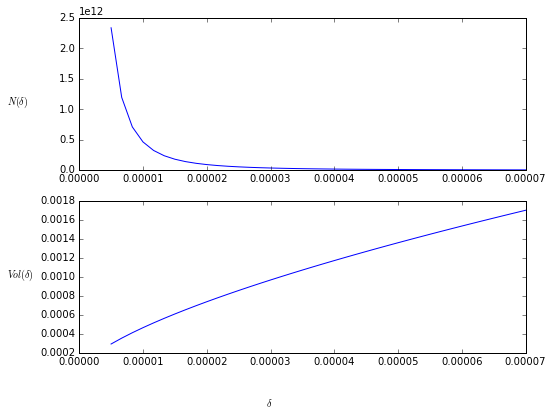

In [79]:
from pylab import *
%matplotlib inline
plt.figure(figsize=(8, 6))  # make the drawing area a bit bigger

ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

droplet_sizes = np.linspace(5e-6, 7e-5, 40)

x = droplet_sizes
y = droplet_number_distribution(x)
y2 = droplet_volume_distribution(x)

print 'Do these values look reasonable???'
print '(N, Vol):'
for d in zip(y, y2)[:4]:
    print '\t', d
print '\t...'
for d in zip(y, y2)[-4:]:
    print '\t', d

ax1.plot(x, y, linewidth=1)
ax2.plot(x, y2, linewidth=1)

ax1.figure.text(0.45, 0.0, r'$\delta$')
ax1.figure.text(0.0, 0.7, r'$N(\delta)$')
ax2.figure.text(0.0, 0.3, r'$Vol(\delta)$')

show()